# Variable 클래스 구현

In [1]:
class Variable:
    def __init__(self,data):
        self.data=data

In [2]:
import numpy as np

data=np.array(1.0)
x=Variable(data)
print(x.data)

1.0


In [3]:
x.data

array(1.)

# 넘파이의 다차원 배열

In [6]:
import numpy as np
x=np.array(1)
x.ndim

0

In [7]:
x=np.array([1,2,3])
x.ndim

1

In [8]:
x=np.array([[1,2,3],
           [4,5,6]])
x.ndim

2

- 벡터를 다룰 때는 '차원'이라는 말에 주의해야 합니다. 예를 들어 np.array([1,2,3])은 벡터인데, 세 개의 요소가 일렬로 늘어서 있기 때문에 '3차원 벡터'라고도 합니다. 이때 '벡터의 차원'은 벡터의 원소수를 말합니다. 한편 '3차원 배열'이라고 할 때의 '배열의 차원'은 (원소가 아닌) 축이 3개라는 뜻입니다.
- 이상과 같이 ndarray 인스턴스를 사용하면 스칼라, 벡터, 행렬, 심지어 더 높은 차원의 텐서를 만들 수 있습니다. 

# 변수를 낳는 함수

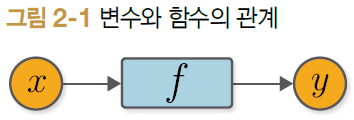
- 위 처럼 원과 사각형 모양의 노드들을 화살표로 연결해 계산 과정을 표현한 그림을 계산 그래프 computational graph라고 합니다. 
- 여기서 변수는 원으로, 함수는 사각형으로 표시하겠습니다.
- '그래프'라고 하면 막대그래프나 원그래프 같은 게 떠오를 수 있지만, 컴퓨터 과학에서 그래프 graph는 노드 node(교점)과 에지(edge,변,간선)으로 구성된 데이터 구조(혹은 그 구조를 나타낸 그림)를 말합니다. 위 그림에서 화살표는 방향이 있는 에지에 해당합니다.

# Function 클래스 구현
- Function 클래스는 Variable 인스턴스를 입력받아 Variable 인스턴스를 출력합니다.
- Variable 인스턴스의 실제 데이터는 인스턴스 변수인 data에 있습니다.

In [9]:
class Function:
    def __call__(self,input):
        x=input.data
        y=x**2
        output=Variable(y)
        return output

In [10]:
x=Variable(np.array(10))
f=Function()
y=f(x)

- Variable 인스턴스인 x를 Function 인스턴스인 f에 입력

In [11]:
print(type(y))
print(y.data)

<class '__main__.Variable'>
100


- Function 클래스는 기반 클래스로서, 모든 함수에 공통되는 기능을 구현합니다.
- 구체적인 함수는 Function 클래스를 상속한 클래스에서 구현합니다.

In [14]:
class Function:
    def __call__(self,input):
        x=input.data
        y=self.forward(x) #구체적인 계산은 forward 메서드에서 한다.
        output=Variable(y)
        return output
    def forward(self,x):
        raise NotImplementedError()

- Function 클래스의 forward 메서드는 예외를 발생시킵니다. 이렇게 해두면 Function 클래스의 forward 메서드를 직접 호출한 사람에게 '이 메서드는 상속하여 구현해야 한다'는 사실을 알려줄 수 있습니다.

In [15]:
class Square(Function):
    def forward(self,x):
        return x**2

- Square 클래스는 Function 클래스를 상속하기 때문에 __call__ 메서드는 그대로 계승됩니다. 따라서 forward 메서드에 구체적인 계산 로직을 작성해 넣는 것만으로 구현은 끝입니다. 실제로 잘 동작하는지 square 클래스를 사용하며 Variable을 처리하는 모습을 보겠습니다.

In [16]:
x=Variable(np.array(10))
f=Square()
y=f(x)
print(type(y))
print(y.data)

<class '__main__.Variable'>
100


# Exp 함수 구현

In [17]:
class Exp(Function):
    def forward(self,x):
        return np.exp(x)

# 함수 연결

In [21]:
A=Square() # Square 객체 생성
B=Exp() #Exp 객체 생성
C=Square() # Square 객체 생성

x=Variable(np.array(0.5)) # Variable 객체를 통해 x 인스턴스 생성
a=A(x) # Square 의 인스턴스 생성
b=B(a) # Exp 의 인스턴스 생성
y=C(b) # Exp값을 Square 한 인스턴스를 생성함
print(y.data) # y인스턴스 내부의 데이터값 출력

1.648721270700128


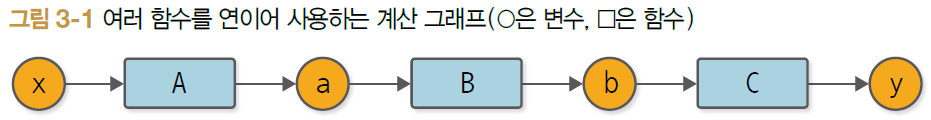
- x,a,b,y가 모두 Variable 인스턴스이다. 
- 위 그림과 같이 여러 함수를 순서대로 적용하여 만들어진 변환 자체를 하나의 큰 함수로 볼 수 있다. 이처럼 여러 함수로 구성된 함수를 합성함수 composite function 라고 합니다. 합성함수를 구성하는 각 함수의 계산은 간단하더라도, 연속으로 적용하면 더 복잡한 계산도 해낼 수 있다는 사실을 기억하세요.

# 수치 미분
- 간단히 말하면 '변화율'을 뜻한다. 예컨대 물체의 시간에 따른 위치 변화율(위치의 미분)은 속도가 됩니다. 시간에 대한 속도 변화율(속도의 미분)은 가속도에 해당합니다. 이와 같은 미분은 변화율을 나타냅니다. 정확한 정의는 **'극한으로 짧은 시간(순간)'** 에서의 변화량입니다.

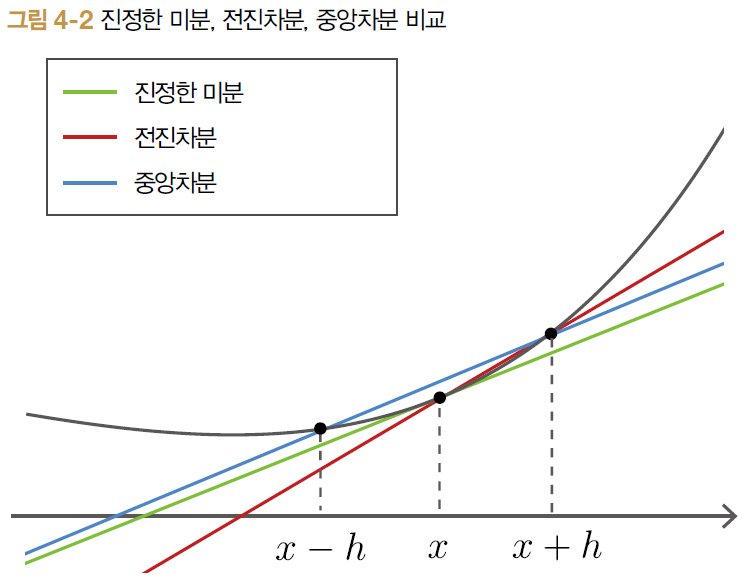
- 전진차분보다 중앙차분이 진정한 미분값에 가깝다는 사실은 테일러 급수를 이용해 증명할 수 있습니다.

In [22]:
def numerical_diff(f,x,eps=1e-4):
    x0=Variable(x.data-eps)
    x1=Variable(x.data+eps)
    y0=f(x0)
    y1=f(x1)
    return (y1.data-y0.data)/(2*eps)

# Square 클래스를 대상으로 미분 하기

In [26]:
f=Square() # Square() 객체생성 
x=Variable(np.array(2.0)) # 숫자 2.0의 x 인스턴스 생성 
dy=numerical_diff(f,x) # 결국 x*2을 미분하면 2x가 되고 여기 x에 2값을 대입하면 4.0이된다.
print(dy)

4.000000000004


In [25]:
print(x.data)

2.0


# 합성 함수의 미분

In [27]:
def f(x):
    A=Square()
    B=Exp()
    C=Square()
    return C(B(A(x)))

x=Variable(np.array(0.5))
dy=numerical_diff(f,x)
print(dy)

3.2974426293330694


# 수치미분의 문제점
- 수치 미분의결과에는 오차가 포함되어 있습니다. 대부분의 경우 오차는 매우 작지만 어떤 계산이냐에 따라 커질 수도 있습니다.
- 수치 미분의 결과에 오차가 포함되기 쉬운 이유는 주로 '자릿수 누락'때문입니다. 중앙차분 등 '차이'를 구하는 계산은 주로 크기가 비슷한 값들을 다루므로 계산 결과에서 자릿수 누락이 생겨 유효 자릿수가 줄어들 수 있습니다. 예를 들어 유효 자릿수가 4일 때 1.234-1.233이라는 계산(비슷한 값끼리의 뺄셈)을 생각해보죠. 계산 결과는 0.001이 되어 유효 자릿수가 1로 줄어듭니다. 원래는 1.234 ... -1.233...=0.001434..같은 결과였을지도 모르는데, 자릿수 누락 때문에 0.001이 됐다고 볼 수 있습니다. 이와 같은 원리 때문에 수치 미분을 이용하면 자릿수 누락이 발생하여 오차가 포함되기 쉽습니다.
- 수치 미분의 더 심각한 문제는 계산량이 많다는 점입니다. 변수가 여러 개인 계산을 미분할 경우 변수 각각을 미분해야 하기 때문입니다. 신경망에서는 매개변수를 수백만 개 이상 사용하는 건 일도 아니므로 이 모두를 수치 미분으로 구하는 것은 현실적이지 않습니다. 그래서 등장한 것이 바로 역전파입니다. 다음 단계에서 드디어 역전파를 소개합니다.
- 덧붙여서, 수치 미분은 구현하기 쉽고 거의 정확한 값을 얻을 수 있습니다. 이에 비해 역전파는 복잡한 알고리즘이라서 구현하면서 버그가 섞여 들어가기 쉽습니다. 그래서 역전파를 정확하게 구현했는지 확인하기 위해 수치 미분의 결과를 이용하곤 합니다. 이를 기울기 확인 gradient checking이라고 하는데, 단순히 수치 미분 결과와 역전파의 결과를 비교하는 것입니다.

# 역전파 이론
- 역전파를 이용하면 미분을 효율적으로 계싼할 수 있고 결괏값의 오차도 더 작습니다. 이번 단계에서는 아직 역전파 구현까지는 들어가지 않고 이론 설명에 집중하겠습니다.

# 연쇄 법칙

- 역전파를 이해하는 열쇠는 연쇄 법칙 chain rule입니다. chain은 '사슬'이라는 뜻으로, 여러 함수를 사슬처럼 연결하여 사용하는 모습을 빗댄 것입니다. 연쇄 법칙에 따르면 합성 함수(여러 함수가 연결된 함수)의 미분은 구성 함수 각각을 미분한 후 곱한 것과 같습니다.
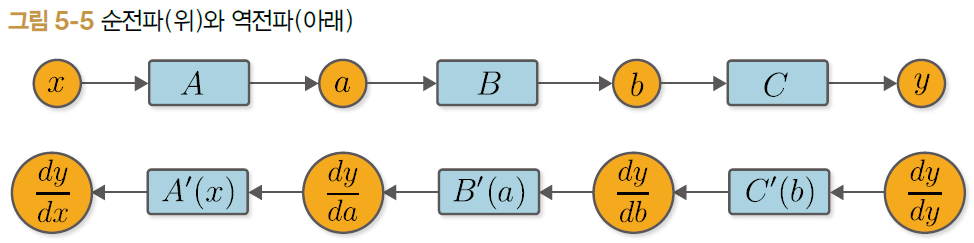
- 역전파 시에는 순전파 시 이용한 데이터가 필요합니다. 따라서 역전파를 구현하려면 먼저 순전파를 하고, 이때 각 함수가 입력 변수(앞의 예에서는 x, a, b)의 값을 기억해두지 않으면 안됩니다. 그런 다음에야 각 함수의 역전파를 계산할 수 있습니다.

# 수동 역전파
- Variable과 Function 클래스를 확장하여 역전파를 이용한 미분을 구현하겠습니다. 

In [28]:
class Variable:
    def __init__(self,data):
        self.data=data
        self.grad=None

- 인스턴스 변수인 data와 grad는 모두 넘파이의 다차원 배열(ndarray)이라고 가정합니다. 또한 grad는 None으로 초기화해둔 다음, 나중에 실제로 역전파를 하면 미분값을계산하여 대입합니다.
- 벡터나 행렬 등 다변수에 대한 미분은 기울기 gradient라고 합니다. Variable 클래스에 새로 추가한 grad 변수의 이름은 gradient를 줄인 것입니다.

# Function 클래스 추가 구현
- 미분을 계산하는 역전파(backward 메서드()
- forward 메서드 호출 시 건네받은 Variable 인스턴스 유지

In [29]:
class Function:
    def __call__(self,input):
        x=input.data
        y=self.forward(x)
        output=Variable(y)
        self.input=input# 입력 변수를 기억(보관)한다.
        return output
    
    def forward(self,x):
        raise NotImplementedError()
    
    def backward(self,x):
        raise NotImplementedError()

- __call__ 메서드에서 입력된 input을 인스턴스 변수인 self.input에 저장합니다. 
- 이렇게 해서 나중에 backward 메서드에서 함수(Function)에 입력한 변수(Variable 인스턴스)가 필요할 때 self.input에서 가져와 사용할 수 있습니다. 

# Square와 Exp 클래스 추가 구현
- Function을 상속한 구체적인 함수에서 역전파(backward)를 구현해보겠습니다. 첫번째 대상은 제곱을 계산하는 Square 클래스입니다.

In [58]:
class Square(Function):
    def forward(self, x):
        y = x ** 2
        return y

    def backward(self, gy):
        x = self.input.data
        gx = 2 * x * gy
        return gx

이 메서드의 인수 gy는 ndarray 인스턴스이며, 출력 쪽에서 전해지는 미분값을 전달하는 역할을 합니다. 그리고 인수로 전달된 미분에 'y=x^2의 미분'을 곱한 값이 backward의결과가 됩니다. 역전파에서는 이 결괏값을 입력 쪽에 더 가까운 다음 함수로 전파해 나갈 것입니다.

In [59]:
class Exp(Function):
    def forward(self, x):
        y = np.exp(x)
        return y

    def backward(self, gy):
        x = self.input.data
        gx = np.exp(x) * gy
        return gx


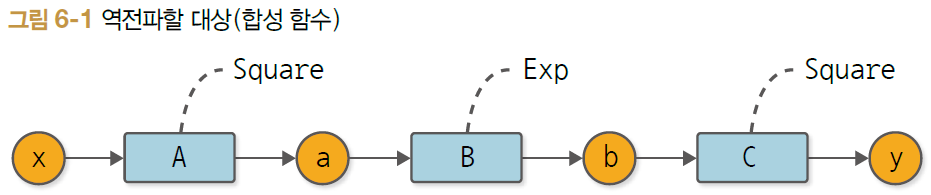


In [60]:
A=Square()
B=Exp()
C=Square()

x=Variable(np.array(0.5))
a=A(x)
b=B(a)
y=C(b)

In [61]:
print(y.data)

1.648721270700128


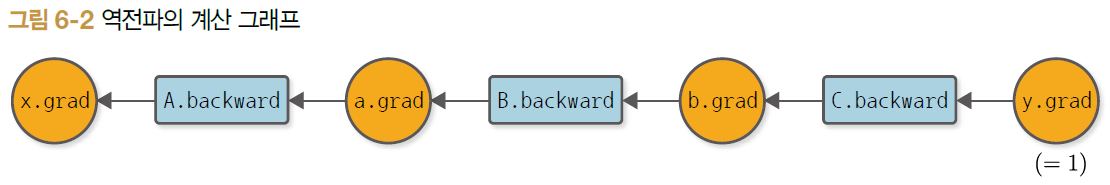

In [62]:
y.grad=np.array(1.0)
b.grad=C.backward(y.grad)#미분값 전송
a.grad=B.backward(b.grad)
x.grad=A.backward(a.grad)
print(x.grad)

3.297442541400256


- 역전파 순서(C->B->A)에 맞춰 호출하는 코드를 우리가 일일이 작성해 넣는 건 영 불편할 것 같습니다.
- 순전파를 한번만 해주면 어떤 계산이라도 상관없이 역전파가 자동으로 이루어지는 구조를 만들자.
- Define-by-Run의 핵심을 건드리는 내용
- Define-by-Run이란 딥러닝에서 수행하는 계산들을 계산 시점에 '연결'하는방식으로, '동적 계산 그래프'라고도 합니다. Define-by-Run의 개념과 장점은 제2고지 마지막의 '칼럼:Define-by-Run'에 자세히 설명합니다.


- 함수의순서를 리스트 형태로 저장해두면 나중에 거꾸로 추적하는 식으로 역전파를 자동화할 수 있습니다. 그러나 분기가 있는 계산 그래프나 같은 변수가 여러 번 사용되는 복잡한 계산 그래프는 단순히 리스트로 저장하는 식으로는 풀 수 없습니다. 우리 목표는 아무리 복잡한 계산 그래프라 하더라도 역전파를 자동으로 할 수 있는 구조를 마련하는 것입니다.

- 사실 리스트 데이터 구조를 응용하면 수행한 계산을 리스트에 추가해 나가는 것만으로 어떠한 계산 그래프의 역전파도 제대로 해낼 수 있습니다. 이 데이터 구조를 웬거트 리스트 Wengert List(혹은 테이브)라고 합니다.

# 역전파 자동화

In [63]:
class Variable:
    def __init__(self, data):
        self.data = data
        self.grad = None
        self.creator = None

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        f = self.creator  # 1. Get a function
        if f is not None:
            x = f.input  # 2. Get the function's input
            x.grad = f.backward(self.grad)  # 3. Call the function's backward
            x.backward()

- 아래 순전파를 계산하면 그 결과로 output이라는 Variable 인스턴스가 생성됩니다. 이때 생성된 output에 '내가 너의 창조자임'을 기억시킵니다. 이 부분이 '연결'을 동적으로 만드는 기법의 핵심입니다. 그런 다음 앞으로를 위해 output을 인스턴스 변수에 저장했습니다.

In [64]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x)
        output = Variable(y)
        output.set_creator(self)  # Set parent(function)
        self.input = input
        self.output = output  # Set output
        return output

    def forward(self, x):
        raise NotImplementedError()

    def backward(self, gy):
        raise NotImplementedError()

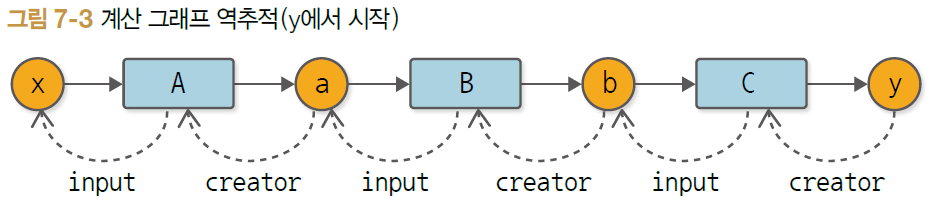

In [65]:
A=Square()
B=Exp()
C=Square()

x=Variable(np.array(0.5))
a=A(x)
b=B(a)
y=C(b)

In [67]:
#assert의 경우 True가 아니면 예외가 발생한다.
assert y.creator==C
assert y.creator.input==b
assert y.creator.input.creator==B
assert y.creator.input.creator.input==a
assert y.creator.input.creator.input.creator==A
assert y.creator.input.creator.input.creator.input==x

1. 함수를 가져온다
2. 함수의 입력을 가져온다.
3. 함수의 backward 메서드를 호출한다.

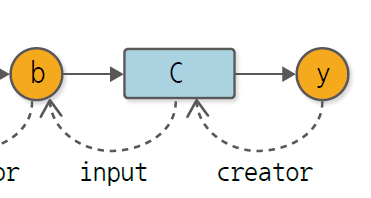

In [68]:
y.grad=np.array(1.0)
C=y.creator # 1. 함수를 가져온다.
b=C.input # 2. 함수의 입력을 가져온다.
b.grad=C.backward(y.grad) # 3.함수의 backward 메서드를 호출한다.

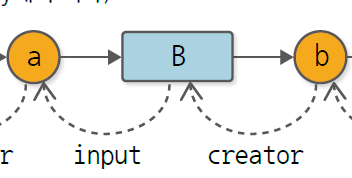

In [69]:
B=b.creator
a=B.input
a.grad=B.backward(b.grad)

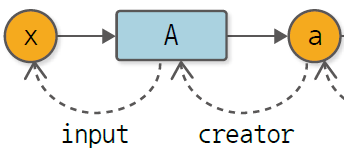

In [70]:
A=a.creator # 1. 함수를 가져온다.
x=A.input # 2. 함수의 입력을 가져온다.
x.grad=A.backward(a.grad) # 3. 함수의 backward 메서드를 호출한다.
print(x.grad)

3.297442541400256


# 7.3 [재귀] backward 메서드 추가 

- backward 메서드는 지금까지 반복한 처리 흐름과 거의 동일합니다. Variable의 creator에서 함수를 얻어오고, 그 함수의 입력 변수를 가져옵니다. 그런 다음 함수의 backward 메서드를 호출합니다. 마지막으로 자신보다 하나 앞에 놓인 변수의 backwad 메서드를 호출합니다. 이런 식으로 각 변수의 backward 메서드가 재귀적으로 불리게 됩니다.

In [72]:
class Variable:
    def __init__(self,data):
        self.data=data
        self.grad=None
        self.creator=None
    def set_creator(self,func):
        self.creator=func
    def backward(self):
        f=self.creator
        if f is not None:
            x=f.input
            x.grad=f.backward(self.grad)
            x.backward()

- Variable 인스턴스의 creator가 None이면 역전파가 중단됩니다. 창조자가 없으므로 이 Variable 인스턴스는 함수 바깥에서 생성됐음을 뜻합니다(높은 확률로 사용자가 만들어 건넨 변수일 것입니다.)

이제 새로워진 Variable을 이용하여 역전파가 자동으로 실행되는 모습을 보겠습니다.

In [73]:
A=Square()
B=Exp()
C=Square()

x=Variable(np.array(0.5))
a=A(x)
b=B(a)
y=C(b)

#역전파
y.grad=np.array(1.0)
y.backward()
print(x.grad)

3.297442541400256


# 재귀에서 반복문으로
- 이번에는 처리 효율을 개선하고 앞으로의 확장을 대비해 backward 메서드의 구현 방식을 바꿔보겠습니다.

In [74]:
class Variable:
    def __init__(self,data):
        self.data=data
        self.grad=None
        self.creator=None
    def set_creator(self,func):
        self.creator=func
    def backward(self):
        funcs=[self.creator]
        while funcs:
            f=funcs.pop()
            x,y=f.input,f.output
            x.grad=f.backward(y.grad)
            
            if x.creator is not None:
                funcs.append(x.creator)

- while 블록 안에서 func.pop()을 호출하여 처리할 함수 f를 꺼내고, f의 backward 메서드를 호출합니다. 이때 f.input과 f.output에서 함수 f의 입력과 출력 변수를 얻음으로써 f.backward()의 인수와 반환값을 올바르게 설정할 수 있습니다.

- 이때 f.input과 f.output에서 함수 f의 입력과 출력 변수를 얻음으로써 f.backward()의 인수와 반환값을 올바르게 설정할 수 있습니다.
- 리스트의 pop 메서드는 리스트에서 마지막 원소로 꺼내줍니다(반환된 요소는 리스트에서 제거됩니다.) 예컨대 funcs=[1,2,3]일 때 x=funcs.pop()을 실행하면 3이 반환되고 funcs는 [1,2]가 됩니다.

# 함수를 더 편리하게

In [75]:
x=Variable(np.array(0.5))
f=Square()
y=f(x)

지금껏 이와 같이 Square 클래스의 인스턴스를 생성한 다음, 이어서 그 인스턴스를 호출하는 두 단계로 구분해 진행해야 합니다. 사용자 입장에서는 조금 번거롭습니다. y=Square()(x) 형태로 한줄로 적을 수도 있지만 모양새가 좋지 않습니다. 더 바람직한 해법은 '파이썬 함수'를 지원하는 것입니다. 그래서 다음 코드를 추가합니다.

In [76]:
def square(x):
    f=Square()
    return f(x)

def exp(x):
    f=Exp()
    return f(x)

- 보다시피 square와 exp라는 두 가지 파이썬 함수를 구현했습니다. 이로써 'DeZero 함수'를 '파이썬 함수'로 이용할 수 있게 됩니다. 참고로 이 코드는 다음과 같이 한 줄로 표현할 수도 있습니다.

In [77]:
def square(x):
    return Square()(x)
def exp(x):
    return Exp()(x)

In [78]:
x=Variable(np.array(0.5))
a=square(x)
b=exp(a)
y=square(b)

y.grad=np.array(1.0)
y.backward()
print(x.grad)

3.297442541400256


- 또한 다음과 같이 함수를 연속으로 적용할 수 있습니다.

In [79]:
x=Variable(np.array(0.5))
y=square(exp(square(x)))
y.grad=np.array(1.0)
y.backward()
print(x.grad)

3.297442541400256


# backward 메서드 간소화

- 역전파 시 사용자의 번거로움을 줄이기 위한 것입니다. 구체적으로는 방금 작성한 코드에서 y.grad=np.array(1.0) 부분을 생략하려 합니다. 지금까지는 역전파할 때마다 y.grad=np.array(1.0)이라는 코드를 작성해야 했습니다. 이 코드를 생략할 수 있도록 Variable의 backward 메서드에 다음 두 줄을 추가합니다.

In [88]:
class Variable:
    def __init__(self, data):
        if data is not None:
            if not isinstance(data, np.ndarray):
                raise TypeError('{} is not supported'.format(type(data)))

        self.data = data
        self.grad = None
        self.creator = None

    def set_creator(self, func):
        self.creator = func

    def backward(self):
        if self.grad is None:
            self.grad = np.ones_like(self.data) #Variable의 data와 grad의 데이터 타입을 같게 만들기 위해서임
                                                #예를 들어 data의 타입이 32비트 부동소수점 숫자면 grad의 타입도 32비트 부동소수점 숫자임
        funcs = [self.creator]
        while funcs:
            f = funcs.pop()
            x, y = f.input, f.output
            x.grad = f.backward(y.grad)

            if x.creator is not None:
                funcs.append(x.creator)

- 이와 같이 인수로주어진 data가 None이 아니고 ndarray 인스턴스도 아니라면 TypeError라는 예외를 발생시킵니다. 이때 오류 메시지로 출력할 문장도 준비합니다. 이제 새로워진 Variable을 사용해봅시다.

In [89]:
x = Variable(np.array(0.5))
y = square(exp(square(x)))
y.backward()
print(x.grad)

TypeError: <class 'numpy.float64'> is not supported

In [90]:
x=np.array([1.0])
y=x**2
print(type(x),x.ndim)
print(type(y))

<class 'numpy.ndarray'> 1
<class 'numpy.ndarray'>


In [91]:
x=np.array(1.0)
y=x**2
print(type(x),x.ndim)
print(type(y))

<class 'numpy.ndarray'> 0
<class 'numpy.float64'>


- x는 0차원의 ndarray인데, 제곱을 하면 np.float64가 되어버립니다. 이상해보일지 모르지만 넘파이가 의도한 동작입니다. 즉, 0차원 ndarray 인스턴스를 사용하여 계산하면 결과의 데이터 타입이 numpy.float64나 numpy.float32 등으로 달라집니다. Variable은 데이터가 항상 ndarray 인스턴스라고 가정하고 있으니 대처를 해줘야 합니다. 이를 위해 우선 다음과 같은 편의 함수를 준비합니다.

In [92]:
def as_array(x):
    if np.isscalar(x):
        return np.array(x)
    return x

- 여기에 쓰인 np.isscalar는 입력 데이터가 numpy.float64 같은 스칼라 타입인지 확인해주는 함수입니다(파이썬의 int와 float 타입도 스칼라로 판단합니다). 다음은 np.isscalar 함수를 사용하는 예입니다.

In [93]:
import numpy as np
np.isscalar(np.float64(1.0))

True

In [95]:
np.isscalar(2.0)

True

In [96]:
np.isscalar(np.array(1.0))

False

In [97]:
np.isscalar(np.array([1,2,3]))

False

- 이처럼 x가 스칼라 타입인지 쉽게 확인할 수 있으며, as_array 함수는 이를 이용하여 입력이 스칼라인 경우 ndarray 인스턴스로 변환해줍니다. 이제 as_array라는 편의 함수가 준비되었으니 Function 클래스에 다음 부분을 추가합니다.

In [99]:
class Function:
    def __call__(self, input):
        x = input.data
        y = self.forward(x)
        output = Variable(as_array(y))## as_array 추가
        output.set_creator(self)
        self.input = input
        self.output = output
        return output

    def forward(self, x):
        raise NotImplementedError()

    def backward(self, gy):
        raise NotImplementedError()

따라서 결과인 output은 항상 ndarray 인스턴스가 되도록 보장해줍니다. 이제 0차원 ndarray 인스턴스를 사용한 계산에서도 모든 데이터는 ndarray 인스턴스이니 안심해도 좋습니다.

# 테스트
- 소프트웨어 개발에서는 테스트를 빼놓을 수 없습니다. 테스트를 해야 실수(버그)를 예방할 수 있으며 테스트를 자동화해야 소프트웨어의 품질을 유지할 수 있습니다. DeZero도 마찬가지 입니다. 그래서 이번 단계에서는 테스트 방법, 특히 딥러닝 프레임워크의 테스트 방법에 대해 설명하겠습니다.
- 소프트웨어 테스트는 규모가 커지면 독특한 규약이나 세세한 규칙이 많아지기 쉽습니다. 그렇다고 테스트를 처음부터 어렵게 생각할 필요는 없습니다. 우선 '테스트한다'는 그 자체가 중요합니다. 이번 단계에서는 본격적인 테스트가 아니라 가능한 한 간단한 테스트를 해보겠습니다.

# 파이썬 단위 테스트

- 파이썬으로 테스트할 때는 표준 라이브러리에 포함된 unitest를 사용하면 편합니다. 여기에서는 이전 단계에서 구현한 square 함수를 테스트해봅시다. 

In [100]:
import unittest

In [101]:
class SquareTest(unittest.TestCase):
    def test_forward(self):
        x=Variable(np.array(2.0))
        y=square(x)
        expected=np.array(4.0)
        expected=np.array(4.0)
        self.assertEqual(y.data,expected)

- 테스트할 때는 이름이 test로 시작하는 메서드를 만들고 그 안에 테스트할 내용을 적습니다. 앞의 테스트는 square 함수의 출력이 기댓값 expected과 같은지 확인합니다. 정확하게는 입력이 2.0일 때 출력이 4.0이 맞는지 확인합니다.
- 앞의 예에서 square 함수의 출력이 기댓값과 같은지 확인하기 위해 self.assertEqual이라는 메서드를 사용했습니다. 이 메서드는 주어진 두 객체가 동일한지 여부를 판정합니다. 이 메서드 외에도 self.assertGreater와 self.assertTrue 등 unittest에는 다양한 메서드가 준비되어 있습니다.

In [105]:
!python ./step10.py

In [106]:
unittest.main()

E
ERROR: C:\Users\richa\AppData\Roaming\jupyter\runtime\kernel-d49c9aa8-e5f1-4960-880e-673db1528251 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\richa\AppData\Roaming\jupyter\runtime\kernel-d49c9aa8-e5f1-4960-880e-673db1528251'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

C:\Users\richa\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [107]:
class SquareTest(unittest.TestCase):
    def test_forward(self):
        x = Variable(np.array(2.0))
        y = square(x)
        expected = np.array(4.0)
        self.assertEqual(y.data, expected)

    def test_backward(self):
        x = Variable(np.array(3.0))
        y = square(x)
        y.backward()
        expected = np.array(6.0)
        self.assertEqual(x.grad, expected)

    def test_gradient_check(self):
        x = Variable(np.random.rand(1))
        y = square(x)
        y.backward()
        num_grad = numerical_diff(square, x)
        flg = np.allclose(x.grad, num_grad)
        self.assertTrue(flg)

- test_backward 메서드를 추가했습니다. 메서드 안에서 y.backward()로 미분값을 구하고, 그 값이 기댓값과 일치하는지 확인합니다.참고로 여기에서 설정한 기댓값 6.0은 손으로 계산해서 하드코딩한 것입니다.

In [108]:
def numerical_diff(f, x, eps=1e-4):
    x0 = Variable(x.data - eps)
    x1 = Variable(x.data + eps)
    y0 = f(x0)
    y1 = f(x1)
    return (y1.data - y0.data) / (2 * eps)


class SquareTest(unittest.TestCase):
    def test_forward(self):
        x = Variable(np.array(2.0))
        y = square(x)
        expected = np.array(4.0)
        self.assertEqual(y.data, expected)

    def test_backward(self):
        x = Variable(np.array(3.0))
        y = square(x)
        y.backward()
        expected = np.array(6.0)
        self.assertEqual(x.grad, expected)

    def test_gradient_check(self):
        x = Variable(np.random.rand(1))
        y = square(x)
        y.backward()
        num_grad = numerical_diff(square, x)
        flg = np.allclose(x.grad, num_grad)
        self.assertTrue(flg)

- 기울기 확인을 할 test_gradient_check 메서드 안에서 무작위 입력값을 하나 생성합니다. 이어서 역전파로 미분값을 구하고, numerical_diff 함수를 사용해서 수치 미분으로도 계산해봅니다. 그런 다음 두 메서드로 각각 구한 값들이 거의 일치하는지 확인합니다. 이때 np.allclose라는 넘파이 함수를 이용합니다. 
- np.allclose(a,b)는 ndarray 인스턴스인 a와 b의 값이 가까운지 판정합니다. 얼마나 가까워야 가까운 것인지는 np.allclose(a,b,rtol=1e-5,atol=1e-05)과 같이 인수 rtol과 atol로 지정할 수 있습니다. 이 함수는 a와 b의 모든 요소가 다음 조건을 만족하면 True를 반환합니다.

- 이와 같이 기울기 확인을 이용하면 미분을 자동으로 계산하는 딥러닝 프레임워크를 반자동으로 테스트할 수 있고, 덕분에 더 체계적으로 더 넓은 범위를 검증하는 테스트 케이스를 만들 수 있습니다.

# 정리
- 딥러닝 프레임워크의 중심에는 역전파가 있습니다. 역전파를 문헌에 따라 '자동 미분'이라고 부르기도 합니다. 하지만 '자동 미분'이라는 용어는 (특히 학술 분야에서는) 더 제한적인 방법을 뜻하므로 주의해야 합니다. 
- 컴퓨터 프로그램에서 미분을 계산하는 방법은 크게 세 가지로 나눌 수 있습니다. 
1. 첫 번째는 수치 미분 numerical differentiation 입니다. 수치 미분은 4단계에서 구현한 것처럼 변수에 미세한 차이를 주어 일반적인 계산(순전파)을 2회 실시하고, 두 출력의 차이로부터 근사적으로 미분을 계산합니다. 수치 미분은 구현하기 쉽지만 출력에 오차가 포함되기 쉽고, 다양의 변수를 사용하는 함수를 다룰 때는 계산 비용이 높다는 단점이 있습니다.
2. 두 번째 방법은 기호 미분 symbolic differentitaion 입니다. 기호 미분은 고등학교 수학에서 배운것처럼 미분 공식을 이용하여 계산하는 방법입니다. 입력도 '수식'이고 출력도 '수식'입니다(수식은 트리 데이터 구조로 표현할 수 있습니다). Mathematica와 MATLAB 등에서 이용하는 방법입니다. -> 기호 미분의 단점은 수식이 크게 부풀어 오르기 쉽다는 것입니다 특히 최적화를 고려하지 않고 구현하면 수식이곧바로 거대해집니다(수식이 폭발한다고합니다). 그런데 딥러닝에서 취급하는 계산은 수많은 변수에 대한 (수식이 아닌) 미분'값'을 효율적으로 구현해야 합니다. 그래서 기호 미분보다 효율적인 방법이 필요합니다.
3. 세 번째 방법은 자동 미분 automatic differentiation입니다. 자동 미분은 연쇄 법칙을 사용하여 미분하는 방법으로, 어떤 함수를 프로그램으로 짜서 건네주면 그 미분을 효율적이고 정밀하게 계산할 수 있습니다. 역전파 방식도 자도 ㅇ미분에 속합니다. 더 정확히 말하면 자동 미분은 크게 두 가지로 나눌 수 있습니다. 바로 'forward 모드'와 'reverse 모드'죠. 역전파는 후자인 'reverse 모드 자동 미분'에 해당합니다.